In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#abriendo los shappefiles
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")
#abriendo los netcdfs
ruta_tmax = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/PISCO_temperature/tx/PISCOdtx_v1.1.nc"
PISCO_tmax = xr.open_dataset(ruta_tmax)
ruta_tmin = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov1p1(tmin).nc"
PISCO_tmin = xr.open_dataset(ruta_tmin, decode_times=False)
PISCO_tmin = PISCO_tmin.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_tmin["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
#tmax_filtros
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmax_anual = tmax_filtro.tx.mean(dim='time')
tmax_season = tmax_filtro.tx.groupby('time.season').mean(dim='time')
tmax_anom = (tmax_season - tmax_anual).to_dataset(name="anom_tx") #anomalia
#anomalia tmax
anom_tx_summer = tmax_anom.anom_tx.isel(season=0)
anom_tx_winter= tmax_anom.anom_tx.isel(season=1)
anom_tx_autumn= tmax_anom.anom_tx.isel(season=2)
anom_tx_spring = tmax_anom.anom_tx.isel(season=3)
#tmin_filtros
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmin_anual = tmin_filtro.tmin.mean(dim='time')
tmin_season = tmin_filtro.tmin.groupby('time.season').mean(dim='time')
tmin_anom = (tmin_season - tmin_anual).to_dataset(name="anom_tmin")
#anomalia tmin
anom_tmin_summer = tmin_anom.anom_tmin.isel(season=0)
anom_tmin_winter = tmin_anom.anom_tmin.isel(season=1)
anom_tmin_autumn = tmin_anom.anom_tmin.isel(season=2)
anom_tmin_spring = tmin_anom.anom_tmin.isel(season=3)

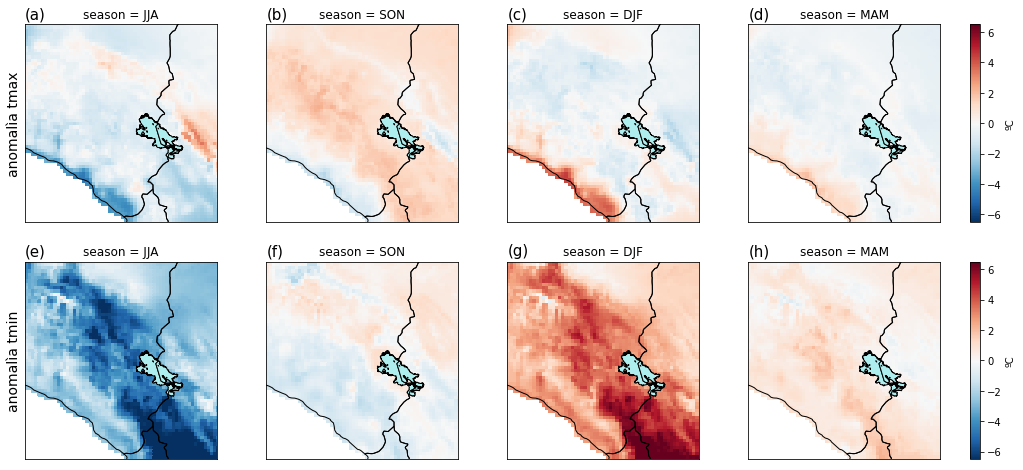

In [5]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

#ANOMALIA TMAX

#anomalia tmax JJA
ax1 = axs[0, 0]
anom_tx_winter.plot(ax = ax1, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax1,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax1,facecolor="paleturquoise",edgecolor="black")
ax1.set_ylabel("anomalìa tmax",size=14)
ax1.set_xlabel("")
ax1.set_yticks([])
ax1.set_xticks([])
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)
ax1.set_title('(a)', loc='left', fontsize = 15)

#anomalia tmax SON
ax2 = axs[0, 1]
anom_tx_spring.plot(ax=ax2, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax2,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax2,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title('(b)', loc='left', fontsize = 15)

#anomalia tmax DJF
ax3 = axs[0,2]
anom_tx_summer.plot(ax=ax3, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax3,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax3,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax3.set_xlim(minx, maxx)
ax3.set_ylim(miny, maxy)
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_title('(c)', loc='left', fontsize = 15)

#anomalia tmax MOM
ax4 = axs[0,3]
anom_tx = anom_tx_autumn.plot(ax=ax4, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax4,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax4,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax4.set_xlim(minx, maxx)
ax4.set_ylim(miny, maxy)
ax4.set_ylabel("")
ax4.set_xlabel("")
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_title('(d)', loc='left', fontsize = 15)
fig.colorbar(anom_tx, ax=axs[0], label = "ºC", pad=0.03, fraction=0.05)


#ANOMALIA TMIN
#anomalia tmax JJA
ax5 = axs[1, 0]
anom_tmin_winter.plot(ax = ax5, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax5,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax5,facecolor="paleturquoise",edgecolor="black")
ax5.set_ylabel("anomalìa tmin", size=14)
ax5.set_xlabel("")
ax5.set_yticks([])
ax5.set_xticks([])
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax5.set_xlim(minx, maxx)
ax5.set_ylim(miny, maxy)
ax5.set_title('(e)', loc='left', fontsize = 15)

#anomalia tmax SON
ax6 = axs[1, 1]
anom_tmin_spring.plot(ax=ax6, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax6,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax6,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax6.set_xlim(minx, maxx)
ax6.set_ylim(miny, maxy)
ax6.set_ylabel("")
ax6.set_xlabel("")
ax6.set_yticks([])
ax6.set_xticks([])
ax6.set_title('(f)', loc='left', fontsize = 15)

#anomalia tmax DJF
ax7 = axs[1,2]
anom_tmin_summer.plot(ax=ax7, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax7,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax7,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax7.set_xlim(minx, maxx)
ax7.set_ylim(miny, maxy)
ax7.set_ylabel("")
ax7.set_xlabel("")
ax7.set_yticks([])
ax7.set_xticks([])
ax7.set_title('(g)', loc='left', fontsize = 15)

#anomalia tmax MOM
ax8 = axs[1,3]
anom_tmin = anom_tmin_autumn.plot(ax=ax8, cmap="RdBu_r", vmin=-6.5,vmax=6.5, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax8,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax8,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax8.set_xlim(minx, maxx)
ax8.set_ylim(miny, maxy)
ax8.set_ylabel("")
ax8.set_xlabel("")
ax8.set_yticks([])
ax8.set_xticks([])
ax8.set_title('(h)', loc='left', fontsize = 15)
fig.colorbar(anom_tmin, ax=axs[1], label = "ºC", pad=0.03, fraction=0.05)
fig.savefig("Figura4.png")